In [1]:
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from imgaug import augmenters as iaa
import custom_augmentation as ciaa
import random

In [2]:
data_path = '/Users/lamhoangtung/cds_data/final/'

In [3]:
labels_file = json.loads(open(os.path.join(data_path, 'train.json'),'r').read())
print('Numbers of sample:', len(labels_file))

Numbers of sample: 28818


In [4]:
labels_file

[{'proximity value': True,
  'angle': 0,
  'rgb_img_path': '/home/linus/Desktop/data/dataset_1552726684.7314272/rgb/2_rgb.jpg',
  'index': 2,
  'speed': 0.0,
  'depth_img_path': '/home/linus/Desktop/data//dataset_1552726684.7314272/depth/2_depth.jpg',
  'class': 1},
 {'proximity value': True,
  'angle': 0,
  'rgb_img_path': '/home/linus/Desktop/data/dataset_1552726684.7314272/rgb/4_rgb.jpg',
  'index': 4,
  'speed': 0.0,
  'depth_img_path': '/home/linus/Desktop/data//dataset_1552726684.7314272/depth/4_depth.jpg',
  'class': 1},
 {'proximity value': True,
  'angle': 0,
  'rgb_img_path': '/home/linus/Desktop/data/dataset_1552726684.7314272/rgb/6_rgb.jpg',
  'index': 6,
  'speed': 0.0,
  'depth_img_path': '/home/linus/Desktop/data//dataset_1552726684.7314272/depth/6_depth.jpg',
  'class': 1},
 {'proximity value': True,
  'angle': 0,
  'rgb_img_path': '/home/linus/Desktop/data/dataset_1552726684.7314272/rgb/8_rgb.jpg',
  'index': 8,
  'speed': 0.0,
  'depth_img_path': '/home/linus/Desktop/

Tạo và kiểm tra path cho các ảnh trong dataset thuii.

In [5]:
for index, each_sample in tqdm(enumerate(labels_file), desc='Creating full path', total=len(labels_file)):
#     rgb_img_path = os.path.join(dataset_path, 'rgb', '{}_rgb.jpg'.format(each_sample['index']))
    each_sample['rgb_img_path'] = each_sample['rgb_img_path'].replace('//','/')
    each_sample['rgb_img_path'] = each_sample['rgb_img_path'].replace('/home/linus/Desktop/data/', data_path)
    rgb_img_path = each_sample['rgb_img_path']
    if not os.path.isfile(rgb_img_path):
        print(rgb_img_path, 'not exist. Skipped')
        labels_file.remove(each_sample)
        continue
#     depth_img_path = os.path.join(dataset_path, 'depth', '{}_rgb.jpg'.format(each_sample['index']))
    each_sample['depth_img_path'] = each_sample['depth_img_path'].replace('//','/')
    each_sample['depth_img_path'] = each_sample['depth_img_path'].replace('/home/linus/Desktop/data/', data_path)
    depth_img_path = each_sample['depth_img_path']
    if not os.path.isfile(depth_img_path):
        print(depth_img_path, 'not exist. Skipped')
        labels_file.remove(each_sample)
        continue
#     labels_file[index]['rgb_img_path'] = rgb_img_path
#     labels_file[index]['depth_img_path'] = depth_img_path

Creating full path: 100%|██████████| 28818/28818 [00:00<00:00, 63670.98it/s]


In [6]:
labels_file

[{'proximity value': True,
  'angle': 0,
  'rgb_img_path': '/Users/lamhoangtung/cds_data/final/dataset_1552726684.7314272/rgb/2_rgb.jpg',
  'index': 2,
  'speed': 0.0,
  'depth_img_path': '/Users/lamhoangtung/cds_data/final/dataset_1552726684.7314272/depth/2_depth.jpg',
  'class': 1},
 {'proximity value': True,
  'angle': 0,
  'rgb_img_path': '/Users/lamhoangtung/cds_data/final/dataset_1552726684.7314272/rgb/4_rgb.jpg',
  'index': 4,
  'speed': 0.0,
  'depth_img_path': '/Users/lamhoangtung/cds_data/final/dataset_1552726684.7314272/depth/4_depth.jpg',
  'class': 1},
 {'proximity value': True,
  'angle': 0,
  'rgb_img_path': '/Users/lamhoangtung/cds_data/final/dataset_1552726684.7314272/rgb/6_rgb.jpg',
  'index': 6,
  'speed': 0.0,
  'depth_img_path': '/Users/lamhoangtung/cds_data/final/dataset_1552726684.7314272/depth/6_depth.jpg',
  'class': 1},
 {'proximity value': True,
  'angle': 0,
  'rgb_img_path': '/Users/lamhoangtung/cds_data/final/dataset_1552726684.7314272/rgb/8_rgb.jpg',
  'i

Augment để còn upsampling nhé

In [7]:
def show_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [8]:
augment_object = iaa.Sequential([
    iaa.Add((-20, 20)),
    iaa.Sometimes(0.5, iaa.AdditiveGaussianNoise(scale=0.03*255)),
    iaa.Sometimes(0.5, iaa.MotionBlur(angle=(0, 360))),
    iaa.Sometimes(0.2, iaa.GammaContrast(gamma=(0.5, 1.44))),
    iaa.Sometimes(0.1, iaa.FastSnowyLandscape(lightness_threshold=(0, 150))),
    iaa.OneOf([
        iaa.Sometimes(0.8, ciaa.RandomShadow()),
        iaa.Sometimes(0.4, ciaa.RandomGravel()),
        iaa.Sometimes(0.2, ciaa.RandomSunFlare()),
        iaa.Sometimes(0.3, ciaa.RandomMotionBlur())
    ])
])

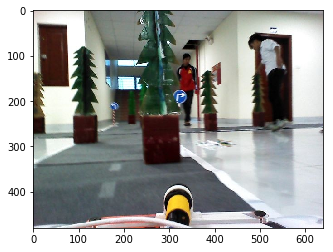

In [9]:
test_img = cv2.imread(random.choice(labels_file)['rgb_img_path'])
show_img(test_img)

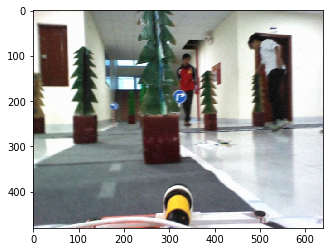

In [11]:
show_img(augment_object.augment_image(test_img))

Flip augmentation nè

0


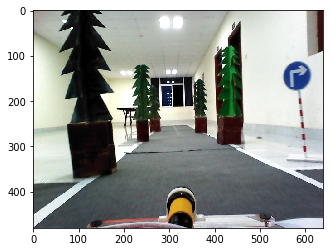

In [12]:
random_sample = random.choice(labels_file)
test_img = cv2.imread(random_sample['rgb_img_path'])
show_img(test_img)
print(random_sample['angle'])

0


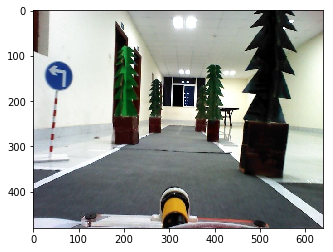

In [13]:
test_img_flip = cv2.flip(test_img, 1)
show_img(test_img_flip)
print(-random_sample['angle'])

In [14]:
def show_distribution(dataset, mode='angle'):
    list_temp = [each[mode] for each in dataset]
#     print(list_temp)
    plt.hist(list_temp)

Xem distribution của góc quay 

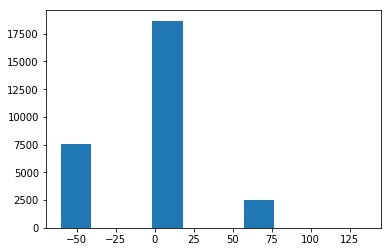

In [15]:
show_distribution(labels_file, 'angle')

Xem distribution của vận tốc

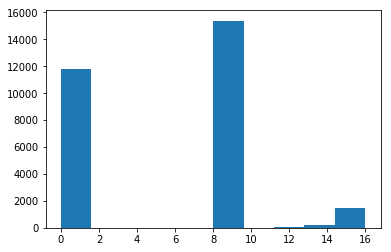

In [16]:
show_distribution(labels_file, 'speed')

Loại hết data khi xe đứng yên và lùi

Numbers of sample after remove stop: 28620


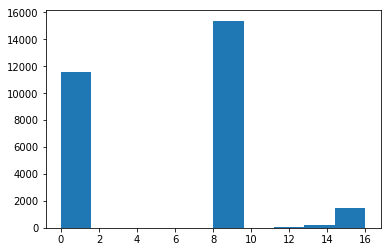

In [25]:
for index, each_sample in enumerate(labels_file):
    last_sample = [each_sample['speed'] for each_sample in labels_file[index-3:index]]
    if each_sample['speed']<=0 and all(sample for sample in last_sample if sample<=0):
        labels_file.remove(each_sample)
    if 'class' not in each_sample.keys():
        labels_file.remove(each_sample)
print('Numbers of sample after remove stop:', len(labels_file))
show_distribution(labels_file, 'speed')

Upsampling để cân distribution giữa các angle

In [34]:
angle_range = [(-60, -5.1), (-5, 5), (5.1, 60)]

In [38]:
def calculate_angle_amount(raw_dataset, have_center=True):
    global left, right, center
    count_dict = {}
    for each_sample in raw_dataset:
        for each_range in angle_range:
            if each_sample['angle'] >= each_range[0] and each_sample['angle'] <= each_range[1]:
                if each_range in count_dict:
                    count_dict[each_range] += 1
                else:
                    count_dict[each_range] = 0
    left = count_dict[angle_range[0]]
    center = count_dict[angle_range[1]] if have_center else 0
    right = count_dict[angle_range[2]]
    print('Left: {} Right: {} Center: {}'.format(left, right, center))
calculate_angle_amount(labels_file)

Left: 7591 Right: 2542 Center: 18484


In [20]:
center/left

2.4519826109866947

In [21]:
center/right

7.322187254130606

In [26]:
raw_left = []
raw_right = []
raw_center = []
for each_sample in labels_file:
#     print(list(each_sample.keys()))
    try:
        if each_sample['class'] == 0:
            raw_left.append(each_sample)
        elif each_sample['class'] == 1:
            raw_center.append(each_sample)
        elif each_sample['class'] == 2:
            raw_right.append(each_sample)
    except KeyError:
        print(each_sample)

In [28]:
len(labels_file)

28620

In [31]:
def augment_flip_image(dataset):
    new_sample_list = []
    for index, each_sample in tqdm(enumerate(dataset), total=len(dataset)):
        old_rgb_path = each_sample['rgb_img_path']
        org_rgb_img = cv2.imread(old_rgb_path)
        new_rgb_img = cv2.flip(org_rgb_img, 1)
        new_rgb_path = old_rgb_path.replace('.jpg','_fliped.jpg')
        cv2.imwrite(new_rgb_path, new_rgb_img)
        old_depth_path = each_sample['depth_img_path']
        org_depth_img = cv2.imread(old_depth_path)            
        new_depth_img = cv2.flip(org_depth_img, 1)
        new_depth_path = old_depth_path.replace('.jpg','_fliped.jpg')
        cv2.imwrite(new_depth_path, new_depth_img)
        new_sample = {
            'index': each_sample['index'],
            'rgb_img_path': new_rgb_path,
            'depth_img_path': new_depth_path,
            'angle': -each_sample['angle'],
            'speed': each_sample['speed'],
            'class': 0 if each_sample['class'] == 1 else 1
        }
        new_sample_list.append(new_sample)
    return new_sample_list

In [32]:
final_data = raw_left + raw_right + augment_flip_image(raw_right) + augment_flip_image(raw_left)

100%|██████████| 7592/7592 [02:37<00:00, 48.25it/s]


In [37]:
calculate_angle_amount(final_data, have_center=False)

Left: 10134 Right: 10134 Center: 0


In [39]:
def augment_duplicate_upsampling(dataset, src_amount, dst_amount, class_num):
    new_sample_list = []
    if dst_amount/src_amount < 2:
        percent_need_upsample = int(((dst_amount-src_amount)/2)/src_amount * 100)
        multiplier = 1
    else:
        percent_need_upsample = 101
        multiplier = (dst_amount // src_amount) - 1
    for index, each_sample in tqdm(enumerate(dataset), total=len(dataset)):
        if each_sample['class'] == class_num:
            for output_index in range(multiplier):
                old_rgb_path = each_sample['rgb_img_path']
                org_rgb_img = cv2.imread(old_rgb_path)            
                new_rgb_img = augment_object.augment_image(org_rgb_img)
                new_rgb_path = old_rgb_path.replace('.jpg','_dup_{}.jpg'.format(output_index))
                cv2.imwrite(new_rgb_path, new_rgb_img)
                new_sample = {
                    'index': each_sample['index'],
                    'rgb_img_path': new_rgb_path,
                    'depth_img_path': each_sample['depth_img_path'],
                    'class': each_sample['class'],
                    'angle': each_sample['angle'],
                    'speed': each_sample['speed']
                }
                new_sample_list.append(new_sample)
    return new_sample_list

In [41]:
final_center = augment_duplicate_upsampling(final_data, 10134, 18484, 0) + augment_duplicate_upsampling(final_data, 10134, 18484, 2)

100%|██████████| 20270/20270 [02:04<00:00, 162.22it/s] 


In [46]:
more_right = augment_duplicate_upsampling(final_data, 12677, 18484, 2)

100%|██████████| 20270/20270 [02:03<00:00, 164.62it/s] 


In [48]:
even_more_right = augment_duplicate_upsampling(final_data, 15220, 18484, 2)

100%|██████████| 20270/20270 [02:08<00:00, 158.22it/s] 


In [49]:
calculate_angle_amount(final_data + final_center + raw_center + more_right + even_more_right)

Left: 17726 Right: 17763 Center: 18484


In [51]:
final_boii = final_data + final_center + raw_center + more_right + even_more_right

In [54]:
len(final_boii)

53976

In [53]:
with open(os.path.join(data_path, 'over_sampled_label.json'), 'w', encoding='utf-8') as outfile:
    json.dump(final_boii, outfile, ensure_ascii=False, sort_keys=False, indent=4)
    outfile.write("\n")